## Neural Network Using Numpy and python

#### Initialising the Weight Matrices


In [1]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


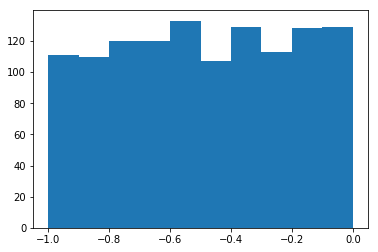

In [3]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

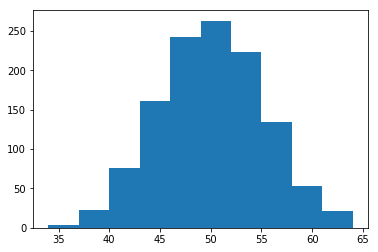

In [4]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

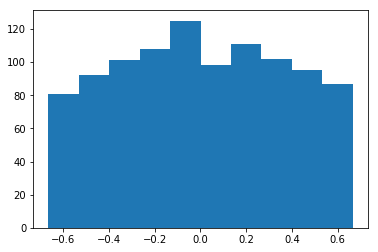

In [5]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

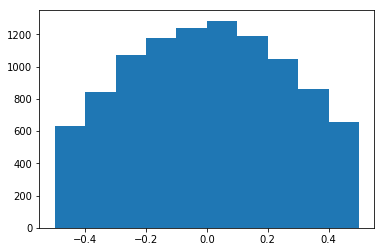

In [7]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

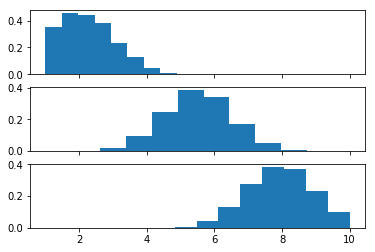

In [8]:



X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), normed=True)
ax[1].hist(X2.rvs(10000), normed=True)
ax[2].hist(X3.rvs(10000), normed=True)
plt.show()

In [9]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[ 0.56385525,  0.26270605,  0.0363352 ],
       [ 0.49699287,  0.21962759, -0.11059364],
       [-0.11513998,  0.16425641,  0.2083763 ],
       [ 0.31512414,  0.52477985, -0.10394372]])

In [10]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes)  # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[-0.00289746,  0.42051905,  0.19401452,  0.42886118],
       [ 0.27464912,  0.10426291, -0.36730645,  0.27334156]])

### Neural Network Class

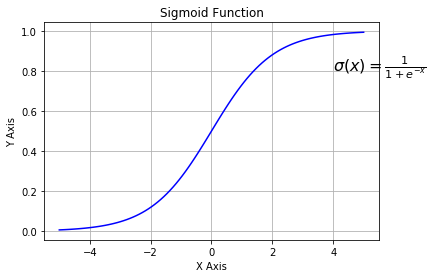

In [12]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

In [13]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.967704535302
[ 0.95257413  0.98201379  0.73105858]
[ 0.68997448  0.90887704  0.99966465]


In [14]:
from scipy.special import expit as activation_function
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        pass
            
    
    def run(self, input_vector):
        """
        running the network with an input vector input_vector. 
        input_vector can be tuple, list or ndarray
        """
        
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector

In [15]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=10,
                               learning_rate=0.6)
simple_network.run([(3, 4)])

array([[ 0.64356358],
       [ 0.48716271]])

In [16]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([ 0.95257413,  0.98201379,  0.99330715])

In [17]:
import numpy as np
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
        
    
    def train(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.weights_in_hidden, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        # update the weights:
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_out += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.weights_hidden_out.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * np.dot(tmp, input_vector.T)
           
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            

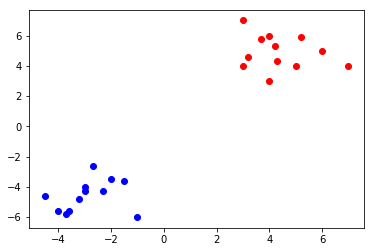

In [18]:
import numpy as np
from matplotlib import pyplot as plt
data1 = [((3, 4), (0.99, 0.01)), ((4.2, 5.3), (0.99, 0.01)), 
         ((4, 3), (0.99, 0.01)), ((6, 5), (0.99, 0.01)), 
         ((4, 6), (0.99, 0.01)), ((3.7, 5.8), (0.99, 0.01)), 
         ((3.2, 4.6), (0.99, 0.01)), ((5.2, 5.9), (0.99, 0.01)), 
         ((5, 4), (0.99, 0.01)), ((7, 4), (0.99, 0.01)), 
         ((3, 7), (0.99, 0.01)), ((4.3, 4.3), (0.99, 0.01))]
data2 = [((-3, -4), (0.01, 0.99)), ((-2, -3.5), (0.01, 0.99)), 
         ((-1, -6), (0.01, 0.99)), ((-3, -4.3), (0.01, 0.99)), 
         ((-4, -5.6), (0.01, 0.99)), ((-3.2, -4.8), (0.01, 0.99)), 
         ((-2.3, -4.3), (0.01, 0.99)), ((-2.7, -2.6), (0.01, 0.99)), 
         ((-1.5, -3.6), (0.01, 0.99)), ((-3.6, -5.6), (0.01, 0.99)), 
         ((-4.5, -4.6), (0.01, 0.99)), ((-3.7, -5.8), (0.01, 0.99))]
data = data1 + data2
np.random.shuffle(data)
points1, labels1 = zip(*data1)
X, Y = zip(*points1)
plt.scatter(X, Y, c="r")
points2, labels2 = zip(*data2)
X, Y = zip(*points2)
plt.scatter(X, Y, c="b")
plt.show()

In [22]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=2,
                               learning_rate=0.6)
    
size_of_learn_sample = int(len(data)*0.9)
learn_data = data[:size_of_learn_sample]
test_data = data[-size_of_learn_sample:]
print()
for i in range(size_of_learn_sample):
    point, label = learn_data[i][0], learn_data[i][1]
    simple_network.train(point, label)
    
for i in range(size_of_learn_sample):
    point, label = learn_data[i][0], learn_data[i][1]
    cls1, cls2 =simple_network.run(point)
    print(point, cls1, cls2,)
    if cls1 > cls2:
        if label == (0.99, 0.01):
            print("class1 correct", label)
        else:
            print("class2 incorrect", label)
    else:
        if label == (0.01, 0.99):
            print("class1 correct", label)
        else:
            print("class2 incorrect", label)

()
((-4, -5.6), array([ 0.42887511]), array([ 0.66534517]))
('class1 correct', (0.01, 0.99))
((-1, -6), array([ 0.42898328]), array([ 0.66514127]))
('class1 correct', (0.01, 0.99))
((-1.5, -3.6), array([ 0.43428348]), array([ 0.65770801]))
('class1 correct', (0.01, 0.99))
((4, 6), array([ 0.67725887]), array([ 0.30894165]))
('class1 correct', (0.99, 0.01))
((-4.5, -4.6), array([ 0.42966385]), array([ 0.66427196]))
('class1 correct', (0.01, 0.99))
((-3, -4), array([ 0.43145042]), array([ 0.66176153]))
('class1 correct', (0.01, 0.99))
((-3.6, -5.6), array([ 0.42891864]), array([ 0.66527812]))
('class1 correct', (0.01, 0.99))
((5.2, 5.9), array([ 0.67729968]), array([ 0.30886952]))
('class1 correct', (0.99, 0.01))
((-2, -3.5), array([ 0.43431628]), array([ 0.65773438]))
('class1 correct', (0.01, 0.99))
((3.7, 5.8), array([ 0.67716119]), array([ 0.30909303]))
('class1 correct', (0.99, 0.01))
((4.3, 4.3), array([ 0.6759297]), array([ 0.31089677]))
('class1 correct', (0.99, 0.01))
((3.2, 4.6

### Alternative activation funcion

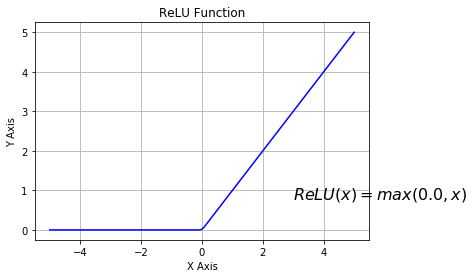

In [23]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)
# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1
    
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-5, 5, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(3, 0.8, r'$ReLU(x)=max(0.0, x)$', fontsize=16)
plt.show()

### Neural network with bias node


In [24]:
import numpy as np
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
        
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None
                ):  
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        
        self.no_of_hidden_nodes = no_of_hidden_nodes
            
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    
        
    
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural 
        network with optional bias nodes"""
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes + bias_node))
        
        
        
    def train(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        
        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )
                                    
            
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.weights_in_hidden, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        
        
        output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        # update the weights:
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_out += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.weights_hidden_out.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:]     # ???? last element cut off, ???
        else:
            x = np.dot(tmp, input_vector.T)
        self.weights_in_hidden += self.learning_rate * x
        
       
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [1]) )
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, [[1]]) )
            
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            
    
    

class1 = [(3, 4), (4.2, 5.3), (4, 3), (6, 5), (4, 6), (3.7, 5.8),
          (3.2, 4.6), (5.2, 5.9), (5, 4), (7, 4), (3, 7), (4.3, 4.3) ] 
class2 = [(-3, -4), (-2, -3.5), (-1, -6), (-3, -4.3), (-4, -5.6), 
          (-3.2, -4.8), (-2.3, -4.3), (-2.7, -2.6), (-1.5, -3.6), 
          (-3.6, -5.6), (-4.5, -4.6), (-3.7, -5.8) ]
labeled_data = []
for el in class1:
    labeled_data.append( [el, [1, 0]])
for el in class2:
    labeled_data.append([el, [0, 1]])
  
np.random.shuffle(labeled_data)
print(labeled_data[:10])
data, labels = zip(*labeled_data)
labels = np.array(labels)
data = np.array(data)


[[(3, 7), [1, 0]], [(4.2, 5.3), [1, 0]], [(-3, -4.3), [0, 1]], [(4, 3), [1, 0]], [(-3, -4), [0, 1]], [(-3.6, -5.6), [0, 1]], [(-2.7, -2.6), [0, 1]], [(-1, -6), [0, 1]], [(5, 4), [1, 0]], [(-3.7, -5.8), [0, 1]]]


In [25]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=10,
                               learning_rate=0.1,
                               bias=None)
    
for _ in range(20):
    for i in range(len(data)):
        simple_network.train(data[i], labels[i])
for i in range(len(data)):
    print(labels[i])
    print(simple_network.run(data[i]))

[1 0]
[[ 0.91941302]
 [ 0.08196323]]
[1 0]
[[ 0.91910792]
 [ 0.0821765 ]]
[0 1]
[[ 0.06901755]
 [ 0.93154498]]
[1 0]
[[ 0.91455785]
 [ 0.08697584]]
[0 1]
[[ 0.06967874]
 [ 0.93090267]]
[0 1]
[[ 0.06708609]
 [ 0.93345244]]
[0 1]
[[ 0.0777059 ]
 [ 0.92292341]]
[0 1]
[[ 0.069473  ]
 [ 0.93004651]]
[1 0]
[[ 0.91836453]
 [ 0.08301194]]
[0 1]
[[ 0.06694814]
 [ 0.93358891]]
[0 1]
[[ 0.06800904]
 [ 0.93253911]]
[1 0]
[[ 0.91961915]
 [ 0.08166789]]
[1 0]
[[ 0.91593439]
 [ 0.08538762]]
[1 0]
[[ 0.91916249]
 [ 0.08233344]]
[0 1]
[[ 0.06733341]
 [ 0.93321784]]
[1 0]
[[ 0.91825523]
 [ 0.0830494 ]]
[0 1]
[[ 0.07030622]
 [ 0.93013946]]
[1 0]
[[ 0.91917982]
 [ 0.08212394]]
[1 0]
[[ 0.91760837]
 [ 0.08370513]]
[1 0]
[[ 0.91947781]
 [ 0.08184381]]
[1 0]
[[ 0.91938114]
 [ 0.08191401]]
[0 1]
[[ 0.07675576]
 [ 0.92333252]]
[0 1]
[[ 0.07468422]
 [ 0.92576456]]
[0 1]
[[ 0.06693363]
 [ 0.93361432]]
